<a href="https://colab.research.google.com/github/vinodnbhat/AIML-CEP-2021-Assignments/blob/main/RBF%20kernel_diff%20gamma%20values_training%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

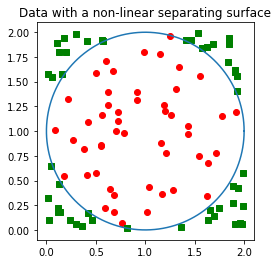

In [2]:
num_samples = 100

np.random.seed(100)

X = []
y = []

radius = 1

center_point = [1., 1.]
center_x1 = center_point[0]
center_x2 = center_point[1]

#generate points within circle (x1-1)^2 + (x2-1)^2 = 1
for i in range (int(num_samples/2)):
  toss = np.random.rand()
  x1 = np.random.uniform(low = 0, high = 2)
  x2 = np.random.uniform(low = 0, high = 2)
  while (x1 - center_x1)**2 + (x2 - center_x2)**2 > radius:
      x1 = np.random.uniform(low = 0, high = 2)
      x2 = np.random.uniform(low = 0, high = 2)

  X.append([x1, x2])
  y.append([1])

#generate points outside circle (x1-1)^2 + (x2-1)^2 = 1
for i in range (int(num_samples/2)):
  toss = np.random.rand()
  x1 = np.random.uniform(low = 0, high = 2)
  x2 = np.random.uniform(low = 0, high = 2)
  while (x1 - center_x1)**2 + (x2 - center_x2)**2 <= radius:
      x1 = np.random.uniform(low = 0, high = 2)
      x2 = np.random.uniform(low = 0, high = 2)

  X.append([x1, x2])
  y.append([-1])

X = np.array(X)
y = np.array(y)

#plot the circle
angle = np.linspace(0, 2*np.pi, 150)

x1 = center_x1 + radius*np.cos(angle)
x2 = center_x2 + radius*np.sin(angle)

figure, axes = plt.subplots(1)

axes.plot(x1, x2)
axes.set_aspect(1)

plt.scatter(X[:int(num_samples/2), 0], X[:int(num_samples/2), 1], marker = 'o', color = 'red')
plt.scatter(X[int(num_samples/2):, 0], X[int(num_samples/2):, 1], marker = 's', color = 'green')

plt.title('Data with a non-linear separating surface')
plt.show()

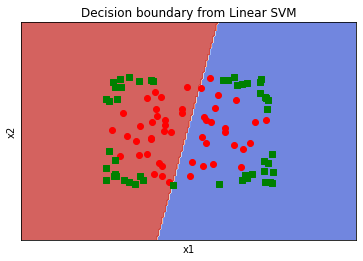

In [5]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C = 1.0)
clf_model = clf.fit(X, y.ravel())

h = 0.02
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])

Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha = 0.8)

plt.scatter(X[:int(num_samples/2), 0], X[:int(num_samples/2), 1], marker = 'o', color = 'red')
plt.scatter(X[int(num_samples/2):, 0], X[int(num_samples/2):, 1], marker = 's', color = 'green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary from Linear SVM')
plt.show()

In [6]:
X_transformed = []

for i in range(num_samples):
  x1 = X[i, 0]
  x2 = X[i, 1]
  X_transformed.append([x1**2, x2**2, np.sqrt(2)*x1, np.sqrt(2)*x2, 1.])

X_transformed = np.array(X_transformed)

clf = LinearSVC(C = 10., max_iter = 10000)
clf_model = clf.fit(X_transformed, y.ravel())

predicted_labels = clf_model.predict(X_transformed)
print(predicted_labels)

train_error = np.sum(0.5 * np.abs(predicted_labels - y.ravel()))/len(y) * 100
train_accuracy = 100 - train_error

print('train accuracy:', train_accuracy)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
train accuracy: 99.0


In [8]:
from sklearn.svm import SVC

clf = SVC(kernel = 'rbf', gamma = 50, max_iter = 10000)
clf_model = clf.fit(X, y.ravel())

predicted_labels = clf.predict(X)
print(predicted_labels)

train_error = np.sum(0.5 * np.abs(predicted_labels - y.ravel()))/len(y) * 100
train_accuracy = 100 - train_error

print('train accuracy with gamma = 50:', train_accuracy)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
train accuracy: 100.0


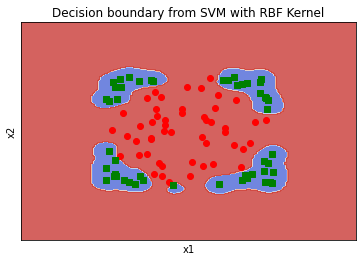

In [9]:
h=0.02 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary from SVM with RBF Kernel with gamma = 50')
plt.show()


In [14]:
clf = SVC(kernel = 'rbf', gamma = 0.0001, max_iter = 10000)
clf_model = clf.fit(X, y.ravel())

predicted_labels = clf.predict(X)
print(predicted_labels)

train_error = np.sum(0.5 * np.abs(predicted_labels - y.ravel()))/len(y) * 100
train_accuracy = 100 - train_error

print('train accuracy for gamma = 0.0001:', train_accuracy)

[ 1 -1  1 -1  1 -1  1 -1  1 -1 -1  1  1  1  1  1 -1 -1  1 -1  1 -1  1  1
  1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1 -1
 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1  1 -1 -1  1 -1
  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1 -1
 -1 -1  1 -1]
train accuracy for gamma = 0.0001: 56.0


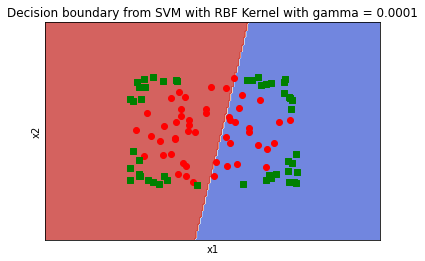

In [15]:
h=0.02 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary from SVM with RBF Kernel with gamma = 0.0001')
plt.show()

In [16]:
clf = SVC(kernel = 'rbf', gamma = 0.001, max_iter = 10000)
clf_model = clf.fit(X, y.ravel())

predicted_labels = clf.predict(X)
print(predicted_labels)

train_error = np.sum(0.5 * np.abs(predicted_labels - y.ravel()))/len(y) * 100
train_accuracy = 100 - train_error

print('train accuracy with gamma = 0.001:', train_accuracy)

[ 1 -1  1 -1  1 -1  1 -1  1 -1 -1  1  1  1  1  1 -1 -1  1 -1  1 -1  1  1
  1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1 -1
 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1  1 -1 -1  1 -1
  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1 -1
 -1 -1  1 -1]
train accuracy with gamma = 0.001: 56.0


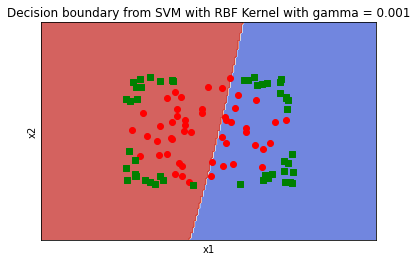

In [17]:
h=0.02 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary from SVM with RBF Kernel with gamma = 0.001')
plt.show()

In [18]:
clf = SVC(kernel = 'rbf', gamma = 0.1, max_iter = 10000)
clf_model = clf.fit(X, y.ravel())

predicted_labels = clf.predict(X)
print(predicted_labels)

train_error = np.sum(0.5 * np.abs(predicted_labels - y.ravel()))/len(y) * 100
train_accuracy = 100 - train_error

print('train accuracy with gamma = 0.1:', train_accuracy)

[ 1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1  1 -1 -1  1 -1
  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1 -1
 -1 -1  1 -1]
train accuracy with gamma = 0.1: 69.0


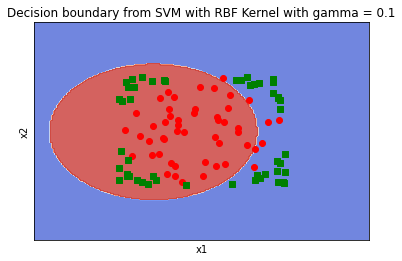

In [19]:
h=0.02 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary from SVM with RBF Kernel with gamma = 0.1')
plt.show()

In [20]:
clf = SVC(kernel = 'rbf', gamma = 1, max_iter = 10000)
clf_model = clf.fit(X, y.ravel())

predicted_labels = clf.predict(X)
print(predicted_labels)

train_error = np.sum(0.5 * np.abs(predicted_labels - y.ravel()))/len(y) * 100
train_accuracy = 100 - train_error

print('train accuracy with gamma = 1:', train_accuracy)

[ 1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
train accuracy with gamma = 1: 96.0


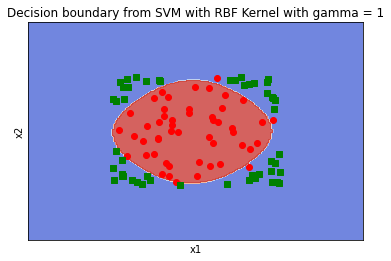

In [21]:
h=0.02 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary from SVM with RBF Kernel with gamma = 1')
plt.show()

In [22]:
clf = SVC(kernel = 'rbf', gamma = 25, max_iter = 10000)
clf_model = clf.fit(X, y.ravel())

predicted_labels = clf.predict(X)
print(predicted_labels)

train_error = np.sum(0.5 * np.abs(predicted_labels - y.ravel()))/len(y) * 100
train_accuracy = 100 - train_error

print('train accuracy with gamma = 25:', train_accuracy)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
train accuracy with gamma = 25: 98.0


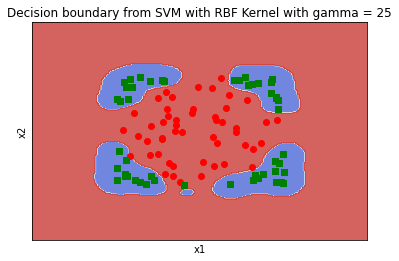

In [23]:
h=0.02 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary from SVM with RBF Kernel with gamma = 25')
plt.show()

In [24]:
clf = SVC(kernel = 'rbf', gamma = 75, max_iter = 10000)
clf_model = clf.fit(X, y.ravel())

predicted_labels = clf.predict(X)
print(predicted_labels)

train_error = np.sum(0.5 * np.abs(predicted_labels - y.ravel()))/len(y) * 100
train_accuracy = 100 - train_error

print('train accuracy with gamma = 75:', train_accuracy)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
train accuracy with gamma = 75: 100.0


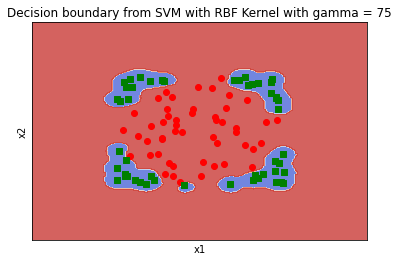

In [26]:
h=0.02 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary from SVM with RBF Kernel with gamma = 75')
plt.show()

In [27]:
clf = SVC(kernel = 'rbf', gamma = 100, max_iter = 10000)
clf_model = clf.fit(X, y.ravel())

predicted_labels = clf.predict(X)
print(predicted_labels)

train_error = np.sum(0.5 * np.abs(predicted_labels - y.ravel()))/len(y) * 100
train_accuracy = 100 - train_error

print('train accuracy with gamma = 100:', train_accuracy)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
train accuracy with gamma = 100: 100.0


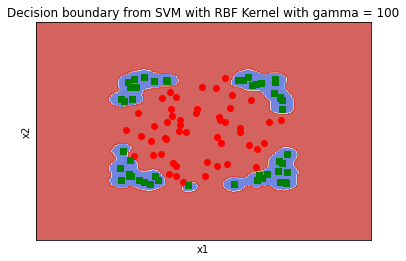

In [28]:
h=0.02 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary from SVM with RBF Kernel with gamma = 100')
plt.show()